<a href="https://colab.research.google.com/github/fbeilstein/topological_data_analysis/blob/master/lecture_12_discrete_morse_theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install topopy

In [ ]:
!pip install "numpy<1.26" --force-reinstall

In [ ]:
# Install necessary libraries
!pip install trimesh vedo topopy

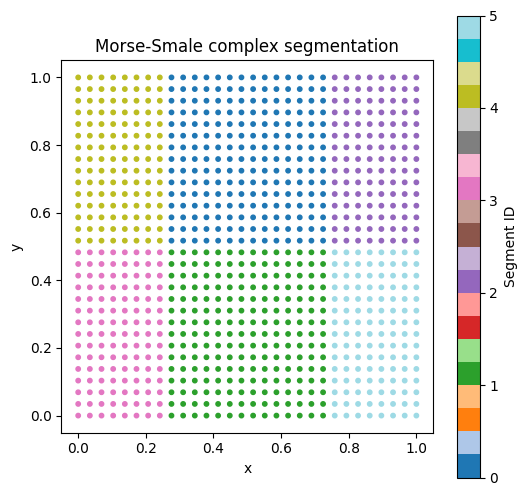

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import topopy
import nglpy as ngl

# Define scalar field (Morse function)
def hill(_x):
  _x = np.atleast_2d(_x)
  x = _x[:, 0]
  y = _x[:, 1]
  #return np.exp(- ((x - .55)**2 + (y-.75)**2)/.125) + 0.01*(x + y)
  return np.sin(2 * np.pi * x) + np.cos(2 * np.pi * y)

# Create a grid of points
res = 30
x = np.linspace(0, 1, res)
y = np.linspace(0, 1, res)
xx, yy = np.meshgrid(x, y)
X = np.vstack([xx.ravel(), yy.ravel()]).T
Y = hill(X)

# Create neighborhood graph
graph = ngl.EmptyRegionGraph(beta=0.15)  # smaller beta for denser graph

# Build Morse-Smale Complex
msc = topopy.MorseSmaleComplex(graph=graph,
                               gradient='steepest',
                               normalization='feature')
msc.build(X, Y)

# Plot: show segmentation
partition = msc.get_partitions()
labels = np.zeros(len(X), dtype=int)

# Assign a unique label to each Morse cell
for i, (_, point_ids) in enumerate(partition.items()):
    for pid in point_ids:
        labels[pid] = i

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10)
plt.title("Morse-Smale complex segmentation")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal')
plt.colorbar(label='Segment ID')
plt.show()


In [10]:
import plotly.graph_objects as go

# X[:, 0] and X[:, 1] are x and y positions, Y is height
fig = go.Figure(data=[
    go.Scatter3d(
        x=X[:, 0],
        y=X[:, 1],
        z=Y,
        mode='markers',
        marker=dict(
            size=2,
            color=labels,  # color by region label
            colorscale='Viridis',
            opacity=0.8,
            showscale=True
        )
    )
])

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Height',
        aspectratio=dict(x=1, y=1, z=1),
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()



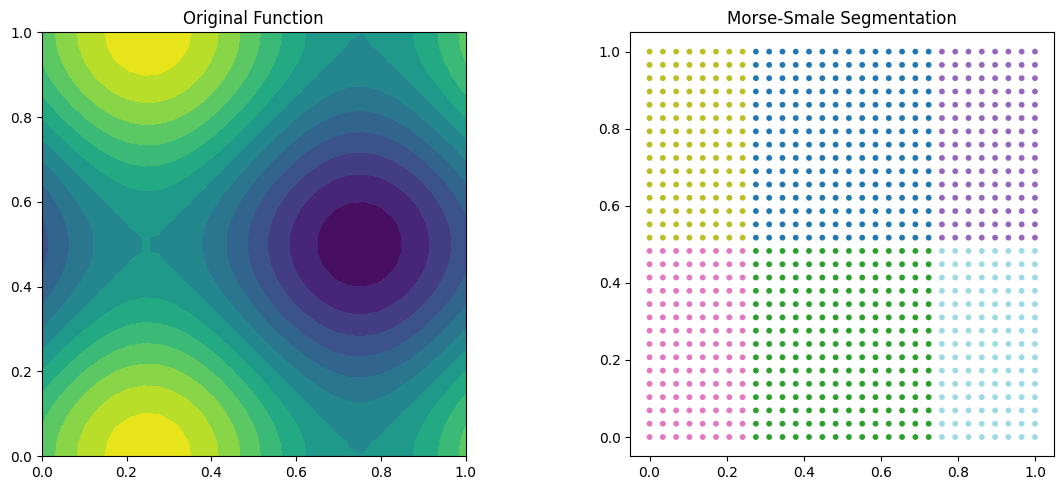

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.tricontourf(X[:,0], X[:,1], Y, levels=14, cmap='viridis')
plt.title("Original Function")
plt.gca().set_aspect('equal')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab20', s=10)
plt.title("Morse-Smale Segmentation")
plt.gca().set_aspect('equal')

plt.tight_layout()
plt.show()
